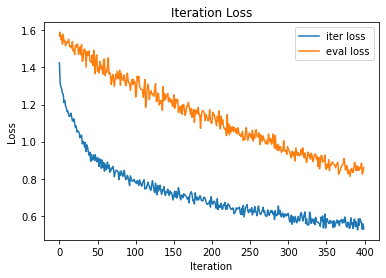

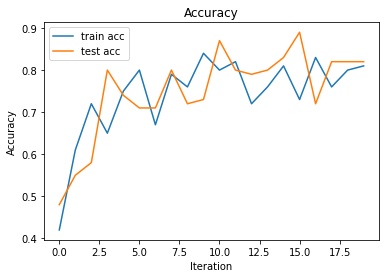

In [1]:
import re
import matplotlib.pyplot as plt

# 读取文本文件
with open('log.txt', 'r') as file:
    text = file.read()

# 提取以iter开头的行中的loss值和eval开头的loss值
iter_loss = re.findall(r'iter: \d+, loss: ([\d.]+)', text)
eval_loss = re.findall(r'eval: \d+, loss: ([\d.]+)', text)

# 提取以batch开头的train和test值
batch_train_test = re.findall(r'batch \d+: train=([\d.]+) test=([\d.]+)', text)
batch_train, batch_test = zip(*batch_train_test)

# 将loss值转换为浮点数
iter_loss = [float(loss) for loss in iter_loss]
eval_loss = [float(loss) for loss in eval_loss]
batch_train = [float(train) for train in batch_train]
batch_test = [float(test) for test in batch_test]

iter_loss = [sum(iter_loss[i:i+5]) / 5 for i in range(0, len(iter_loss), 5)]
iter_loss = [sum(iter_loss[i:i+20]) / 20 for i in range(0, len(iter_loss), 20)]
eval_loss = [sum(eval_loss[i:i+20]) / 20 for i in range(0, len(eval_loss), 20)]
batch_train = [sum(batch_train[i:i+20]) / 20 for i in range(0, len(batch_train), 20)]
batch_test = [sum(batch_test[i:i+20]) / 20 for i in range(0, len(batch_test), 20)]

# 绘制折线图
plt.figure()

# 绘制iter loss折线图

plt.plot(iter_loss, label='iter loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration Loss')
plt.legend()
# 绘制eval loss折线图
plt.plot(eval_loss, label='eval loss')
plt.legend()

plt.figure()
plt.plot(batch_train, label='train acc')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.plot(batch_test, label='test acc')
plt.legend()


# 显示图形
plt.show()